# Analysis of the national diversity of the population in Barcelona

In [3]:
import pandas as pd

## Reading the data from csv files

Used datasets from the year 2017 since the information is complete regarding nationalities and their residence in Barcelona. Poverty rates were also available from Ajuntament de Barcelona for the year 2017. Read the files into panda dataframes and rename columns to avoid conflicts while merging.

In [4]:
pop = pd.read_csv("data/population.csv")
pop.columns = ["Year", "District_Code", "District_Name", "Neighborhood_Code", "Neighborhood_Name", "Gender", "Age", "Total_Number"]

ibn = pd.read_csv("data/immigrants-by-nationality.csv")
ibn.columns = ["Year", "District_Code", "District_Name", "Neighborhood_Code", "Neighborhood_Name", "Nationality", "Immigrants_Number"]

prt = pd.read_csv("data/poverty_rate_table.tst", sep='\t')
prt.columns = ["District_Code", "District_Name", "Perc_BPL"]

Converting the datatypes in the poverty rate table

In [5]:
prt["District_Code"] = prt["District_Code"].astype(int)
prt["Perc_BPL"] = prt["Perc_BPL"].astype(float)

## Districts sorted by poverty rates

In [6]:
prt.sort_values("Perc_BPL", ascending=False)

,District_Code,District_Name,Perc_BPL
7,8,Nou Barris,43.3
0,1,Ciutat Vella,37.2
2,3,Sants-Montjuïc,29.1
8,9,Sant Andreu,25.9
9,10,Sant Martí,24.2
6,7,Horta-Guinardó,23.3
3,4,Les Corts,20.2
1,2,Eixample,19.8
5,6,Gràcia,17.6
4,5,Sarrià-Sant Gervasi,10.4


In [7]:
# Filtering the population data to retain values only from the year 2017
pop_2017 = pop[pop["Year"] == 2017]

In [8]:
# Grouping the whole population data by districts and calculating the total population per district
pop_dist_2017 = pop_2017.groupby(["District_Code", "District_Name"], as_index=False).aggregate({"Total_Number":"sum"})

In [9]:
pop_dist_2017

,District_Code,District_Name,Total_Number
0,1,Ciutat Vella,101387
1,2,Eixample,266416
2,3,Sants-Montjuïc,181910
3,4,Les Corts,82033
4,5,Sarrià-Sant Gervasi,149279
5,6,Gràcia,121347
6,7,Horta-Guinardó,168751
7,8,Nou Barris,166579
8,9,Sant Andreu,147594
9,10,Sant Martí,235513


## Data Cleaning

In [10]:
# Filtering the immigrants by nationality table to retain values only from year 2017

ibn_2017 = ibn[ibn["Year"] == 2017]

In [11]:
ibn_2017

,Year,District_Code,District_Name,Neighborhood_Code,Neighborhood_Name,Nationality,Immigrants_Number
0,2017,1,Ciutat Vella,1,el Raval,Spain,1109
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Spain,482
2,2017,1,Ciutat Vella,3,la Barceloneta,Spain,414
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Spain,537
4,2017,2,Eixample,5,el Fort Pienc,Spain,663
...,...,...,...,...,...,...,...
11761,2017,10,Sant Martí,70,el Besòs i el Maresme,No information,0
11762,2017,10,Sant Martí,71,Provençals del Poblenou,No information,0
11763,2017,10,Sant Martí,72,Sant Martí de Provençals,No information,0
11764,2017,10,Sant Martí,73,la Verneda i la Pau,No information,0


In [12]:
# Cleaning the rows with district_code == 99, where there is no information available in other columns
#ibn_2017 = ibn[ibn["District_Code"] != 99]
ibn_2017 = ibn_2017.loc[ibn_2017["District_Code"] != 99]

    The goal of this project is to analyze immigrants arriving from outside of Spain. So I will exclude the residents with Spanish nationality who have moved from other parts of Spain to Barcelona. The residents with Italian nationality might be an artefact, because it might include many latin-americans who might have received the Italian nationality by heritage. Therefore I will also exclude the residents of Spanish and Italian residents.
    

In [13]:
# Removing the rows for Spanish and Italian Nationality 
ibn_2017 = ibn_2017.loc[ibn_2017["Nationality"] != "Spain"]
ibn_2017 = ibn_2017.loc[ibn_2017["Nationality"] != "Italy"]

### Calculating the number of immigrants for each nationality in Barcelona

In [14]:
ibn_nat_2017 = ibn_2017.groupby("Nationality",as_index=False).aggregate({"Immigrants_Number":"sum"})

In [15]:
ibn_nat_2017["Imm_Tot_Nat"] = ibn_nat_2017["Immigrants_Number"]

In [16]:
ibn_nat_2017 = ibn_nat_2017[["Nationality", "Imm_Tot_Nat"]]

In [17]:
ibn_nat_2017.sort_values("Imm_Tot_Nat", ascending=False).head(10)

,Nationality,Imm_Tot_Nat
29,China,3299
30,Colombia,3255
152,Venezuela,3021
109,Pakistan,2967
60,Honduras,2767
48,France,2670
112,Peru,2473
96,Morocco,1931
6,Argentina,1885
20,Brasil,1757


In [18]:
# Calculating total immigrants in each district
ibn_dist_2017 = ibn_2017.groupby(["District_Code", "District_Name"], as_index=False).aggregate({"Immigrants_Number":"sum"})

In [19]:
ibn_dist_2017["Immigrants_Total"] = ibn_dist_2017["Immigrants_Number"]
ibn_dist_2017.drop("Immigrants_Number", inplace=True, axis=1)

In [20]:
ibn_dist_2017

,District_Code,District_Name,Immigrants_Total
0,1,Ciutat Vella,8794
1,2,Eixample,10919
2,3,Sants-Montjuïc,6780
3,4,Les Corts,2215
4,5,Sarrià-Sant Gervasi,3406
5,6,Gràcia,3712
6,7,Horta-Guinardó,4131
7,8,Nou Barris,5115
8,9,Sant Andreu,3396
9,10,Sant Martí,7196


### Estimating the total immigrant population in each district

Merge the tables to calculate the ratio of immigrants over the total population in each district.

In [21]:
ibn_pop_dist_2017 = ibn_dist_2017.merge(pop_dist_2017, how="inner")

In [22]:
ibn_pop_dist_2017["Immigrant_Perc"] = ibn_pop_dist_2017["Immigrants_Total"]/ibn_pop_dist_2017["Total_Number"]*100

In [23]:
ibn_pop_dist_2017.sort_values("Immigrant_Perc", ascending=False)

,District_Code,District_Name,Immigrants_Total,Total_Number,Immigrant_Perc
0,1,Ciutat Vella,8794,101387,8.673696
1,2,Eixample,10919,266416,4.098478
2,3,Sants-Montjuïc,6780,181910,3.727118
7,8,Nou Barris,5115,166579,3.070615
5,6,Gràcia,3712,121347,3.058996
9,10,Sant Martí,7196,235513,3.055458
3,4,Les Corts,2215,82033,2.700133
6,7,Horta-Guinardó,4131,168751,2.447985
8,9,Sant Andreu,3396,147594,2.300907
4,5,Sarrià-Sant Gervasi,3406,149279,2.281634


In [24]:
# Calculating the sum of immigrants for each nationality in each district
ibn_dist_nat_2017 = ibn_2017.groupby(["District_Code", "District_Name", "Nationality"], as_index=False).aggregate({"Immigrants_Number":"sum"})

In [25]:
ibn_dist_nat_2017

,District_Code,District_Name,Nationality,Immigrants_Number
0,1,Ciutat Vella,Afghanistan,10
1,1,Ciutat Vella,Albania,9
2,1,Ciutat Vella,Algeria,75
3,1,Ciutat Vella,Andorra,1
4,1,Ciutat Vella,Angola,1
...,...,...,...,...
1565,10,Sant Martí,Venezuela,355
1566,10,Sant Martí,Vietnam,11
1567,10,Sant Martí,Yemen,0
1568,10,Sant Martí,Zambia,0


In [26]:
ibn_dist_nat_2017 = ibn_dist_nat_2017.merge(ibn_dist_2017, how="inner")

In [27]:
ibn_dist_nat_2017

,District_Code,District_Name,Nationality,Immigrants_Number,Immigrants_Total
0,1,Ciutat Vella,Afghanistan,10,8794
1,1,Ciutat Vella,Albania,9,8794
2,1,Ciutat Vella,Algeria,75,8794
3,1,Ciutat Vella,Andorra,1,8794
4,1,Ciutat Vella,Angola,1,8794
...,...,...,...,...,...
1565,10,Sant Martí,Venezuela,355,7196
1566,10,Sant Martí,Vietnam,11,7196
1567,10,Sant Martí,Yemen,0,7196
1568,10,Sant Martí,Zambia,0,7196


In [28]:
ibn_dist_nat_2017["Immigrant_Perc_by_Nat"] = ibn_dist_nat_2017["Immigrants_Number"]/ibn_dist_nat_2017["Immigrants_Total"]*100

In [29]:
ibn_dist_nat_2017_cv = ibn_dist_nat_2017[ibn_dist_nat_2017["District_Code"] == 1]
ibn_dist_nat_2017_eixample = ibn_dist_nat_2017[ibn_dist_nat_2017["District_Code"] == 2]
ibn_dist_nat_2017_sants = ibn_dist_nat_2017[ibn_dist_nat_2017["District_Code"] == 3]
ibn_dist_nat_2017_gracia = ibn_dist_nat_2017[ibn_dist_nat_2017["District_Code"] == 6]
ibn_dist_nat_2017_sarria = ibn_dist_nat_2017[ibn_dist_nat_2017["District_Code"] == 5]

In [30]:
ibn_dist_nat_2017_gracia.sort_values("Immigrant_Perc_by_Nat", ascending=False).head(10)

,District_Code,District_Name,Nationality,Immigrants_Number,Immigrants_Total,Immigrant_Perc_by_Nat
833,6,Gràcia,France,277,3712,7.462284
815,6,Gràcia,Colombia,200,3712,5.387931
937,6,Gràcia,Venezuela,189,3712,5.091595
791,6,Gràcia,Argentina,166,3712,4.471983
933,6,Gràcia,United Kingdom,151,3712,4.067888
805,6,Gràcia,Brasil,148,3712,3.987069
897,6,Gràcia,Peru,146,3712,3.933190
837,6,Gràcia,Germany,141,3712,3.798491
814,6,Gràcia,China,140,3712,3.771552
934,6,Gràcia,United States,131,3712,3.529095


In [31]:
ibn_dist_nat_2017_eixample.sort_values("Immigrant_Perc_by_Nat", ascending=False).head(10)

,District_Code,District_Name,Nationality,Immigrants_Number,Immigrants_Total,Immigrant_Perc_by_Nat
186,2,Eixample,China,918,10919,8.407363
187,2,Eixample,Colombia,781,10919,7.152670
309,2,Eixample,Venezuela,724,10919,6.630644
205,2,Eixample,France,665,10919,6.090301
163,2,Eixample,Argentina,517,10919,4.734866
177,2,Eixample,Brasil,479,10919,4.386849
269,2,Eixample,Peru,478,10919,4.377690
306,2,Eixample,United States,387,10919,3.544281
249,2,Eixample,Mexico,333,10919,3.049730
305,2,Eixample,United Kingdom,326,10919,2.985621


In [32]:
ibn_dist_nat_2017_cv.sort_values("Immigrant_Perc_by_Nat", ascending=False).head(10)

,District_Code,District_Name,Nationality,Immigrants_Number,Immigrants_Total,Immigrant_Perc_by_Nat
109,1,Ciutat Vella,Pakistan,998,8794,11.348647
48,1,Ciutat Vella,France,596,8794,6.777348
12,1,Ciutat Vella,Bangladesh,566,8794,6.436207
96,1,Ciutat Vella,Morocco,434,8794,4.935183
148,1,Ciutat Vella,United Kingdom,393,8794,4.468956
113,1,Ciutat Vella,Philippines,368,8794,4.184671
63,1,Ciutat Vella,India,364,8794,4.139186
6,1,Ciutat Vella,Argentina,319,8794,3.627473
52,1,Ciutat Vella,Germany,293,8794,3.331817
30,1,Ciutat Vella,Colombia,269,8794,3.058904


In [33]:
ibn_dist_nat_2017_sants.sort_values("Immigrant_Perc_by_Nat", ascending=False).head(10)

,District_Code,District_Name,Nationality,Immigrants_Number,Immigrants_Total,Immigrant_Perc_by_Nat
343,3,Sants-Montjuïc,China,512,6780,7.551622
344,3,Sants-Montjuïc,Colombia,431,6780,6.356932
423,3,Sants-Montjuïc,Pakistan,422,6780,6.224189
426,3,Sants-Montjuïc,Peru,365,6780,5.383481
466,3,Sants-Montjuïc,Venezuela,334,6780,4.926254
377,3,Sants-Montjuïc,India,318,6780,4.690265
410,3,Sants-Montjuïc,Morocco,311,6780,4.587021
374,3,Sants-Montjuïc,Honduras,261,6780,3.849558
362,3,Sants-Montjuïc,France,242,6780,3.569322
353,3,Sants-Montjuïc,Dominican Republic,238,6780,3.510324


In [34]:
ibn_dist_nat_2017_sarria.sort_values("Immigrant_Perc_by_Nat", ascending=False).head(10)

,District_Code,District_Name,Nationality,Immigrants_Number,Immigrants_Total,Immigrant_Perc_by_Nat
676,5,Sarrià-Sant Gervasi,France,315,3406,9.248385
777,5,Sarrià-Sant Gervasi,United States,263,3406,7.721668
780,5,Sarrià-Sant Gervasi,Venezuela,215,3406,6.312390
657,5,Sarrià-Sant Gervasi,China,163,3406,4.785672
658,5,Sarrià-Sant Gervasi,Colombia,128,3406,3.758074
776,5,Sarrià-Sant Gervasi,United Kingdom,126,3406,3.699354
746,5,Sarrià-Sant Gervasi,Russia,119,3406,3.493834
648,5,Sarrià-Sant Gervasi,Brasil,111,3406,3.258955
680,5,Sarrià-Sant Gervasi,Germany,110,3406,3.229595
720,5,Sarrià-Sant Gervasi,Mexico,110,3406,3.229595


#### Analyze the overall distribution of immigrants of each nationality across different districts

In [48]:
ibn_nat_distribution = ibn_dist_nat_2017.merge(ibn_nat_2017, how="inner")

In [49]:
ibn_nat_distribution["Imm_Tot_Nat"].describe([.50,.75,.95])

count    1570.000000
mean      354.547771
std       694.142500
min         1.000000
50%        44.000000
75%       265.000000
95%      1931.000000
max      3299.000000
Name: Imm_Tot_Nat, dtype: float64

In [50]:
ibn_nat_distribution["Imm_dist_over_bcn"] = ibn_nat_distribution["Immigrants_Number"]/ibn_nat_distribution["Imm_Tot_Nat"]*100


In [51]:
ibn_nat_distribution = ibn_nat_distribution[["District_Code", "District_Name", "Nationality", "Immigrants_Number", "Imm_Tot_Nat", "Imm_dist_over_bcn"]]

In [52]:
ibn_nat_distribution["Imm_Tot_Nat"].describe([.75,.85,.95])

count    1570.000000
mean      354.547771
std       694.142500
min         1.000000
50%        44.000000
75%       265.000000
85%       815.000000
95%      1931.000000
max      3299.000000
Name: Imm_Tot_Nat, dtype: float64

#### Looking at the skewness of the immigrant population for each nationality.
    There are many nationalities with very few immigrants and represent a small fraction of the entire immigrant population.

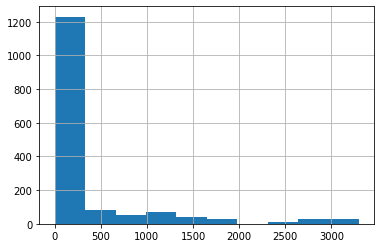

In [53]:
ibn_nat_distribution["Imm_Tot_Nat"].hist()

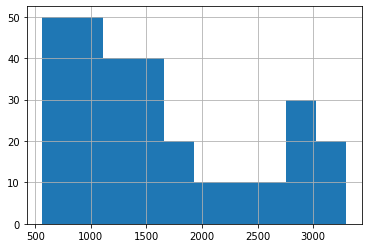

In [40]:
ibn_nat_distribution[ibn_nat_distribution["Imm_Tot_Nat"] > 500]["Imm_Tot_Nat"].hist()

#### Filter out for nationalities with a population of less than 500 in Barcelona


In [41]:
ibn_nat_distribution_ov_500 = ibn_nat_distribution[ibn_nat_distribution["Imm_Tot_Nat"] > 500]

In [42]:
ibn_nat_distribution_cv = ibn_nat_distribution_ov_500[ibn_nat_distribution_ov_500["District_Code"] == 1]

In [61]:
ibn_nat_distribution_cv.sort_values("Imm_dist_over_bcn", ascending=False).head(10)

,District_Code,District_Name,Nationality,Immigrants_Number,Imm_Tot_Nat,Imm_dist_over_bcn
120,1,Ciutat Vella,Bangladesh,566,815,69.447853
1130,1,Ciutat Vella,Philippines,368,780,47.179487
1090,1,Ciutat Vella,Pakistan,998,2967,33.636670
1010,1,Ciutat Vella,Netherlands,180,561,32.085561
1480,1,Ciutat Vella,United Kingdom,393,1459,26.936258
630,1,Ciutat Vella,India,364,1441,25.260236
520,1,Ciutat Vella,Germany,293,1240,23.629032
960,1,Ciutat Vella,Morocco,434,1931,22.475401
480,1,Ciutat Vella,France,596,2670,22.322097
1490,1,Ciutat Vella,United States,263,1507,17.451891


In [55]:
ibn_nat_distribution_sm = ibn_nat_distribution_ov_500[ibn_nat_distribution_ov_500["District_Code"] == 3]

In [60]:
ibn_nat_distribution_sm.sort_values("Imm_dist_over_bcn", ascending=False).head(10)

,District_Code,District_Name,Nationality,Immigrants_Number,Imm_Tot_Nat,Imm_dist_over_bcn
632,3,Sants-Montjuïc,India,318,1441,22.068008
392,3,Sants-Montjuïc,Dominican Republic,238,1196,19.899666
1132,3,Sants-Montjuïc,Philippines,144,780,18.461538
172,3,Sants-Montjuïc,Bolivia,176,1051,16.745956
962,3,Sants-Montjuïc,Morocco,311,1931,16.105645
292,3,Sants-Montjuïc,China,512,3299,15.519855
1112,3,Sants-Montjuïc,Paraguay,118,763,15.465269
402,3,Sants-Montjuïc,Ecuador,212,1432,14.804469
1122,3,Sants-Montjuïc,Peru,365,2473,14.759402
1092,3,Sants-Montjuïc,Pakistan,422,2967,14.223121


In [57]:
ibn_nat_distribution_sarria = ibn_nat_distribution_ov_500[ibn_nat_distribution_ov_500["District_Code"] == 5]

In [59]:
ibn_nat_distribution_sarria.sort_values("Imm_dist_over_bcn", ascending=False).head(10)

,District_Code,District_Name,Nationality,Immigrants_Number,Imm_Tot_Nat,Imm_dist_over_bcn
1494,5,Sarrià-Sant Gervasi,United States,263,1507,17.451891
484,5,Sarrià-Sant Gervasi,France,315,2670,11.797753
924,5,Sarrià-Sant Gervasi,Mexico,110,1153,9.540330
1184,5,Sarrià-Sant Gervasi,Russia,119,1299,9.160893
524,5,Sarrià-Sant Gervasi,Germany,110,1240,8.870968
1484,5,Sarrià-Sant Gervasi,United Kingdom,126,1459,8.636052
1154,5,Sarrià-Sant Gervasi,Portugal,80,962,8.316008
1524,5,Sarrià-Sant Gervasi,Venezuela,215,3021,7.116849
1114,5,Sarrià-Sant Gervasi,Paraguay,49,763,6.422018
204,5,Sarrià-Sant Gervasi,Brasil,111,1757,6.317587
